In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append('/Users/gsinyakov/ts_course_summer/')

In [3]:
import model
import load_dataset
from plotting import plot_multiple_ts

#### Возьмем временной ряд

In [56]:
dataset = load_dataset.Dataset('../data/dataset/')

In [57]:
ts = dataset['hour_376.csv']

In [58]:
ts.head()

2019-05-19T03:00:00
2019-05-19 04:00:00     1.0
2019-05-19 05:00:00     6.0
2019-05-19 06:00:00    11.0
2019-05-19 07:00:00    16.0
2019-05-19 08:00:00    26.0
Name: 2.0, dtype: float64

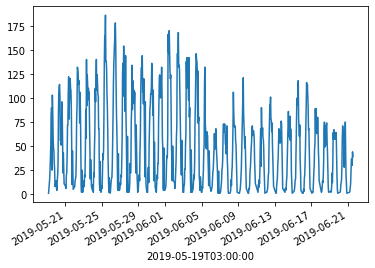

In [59]:
ts.plot()

####  Зададим гранулярность

In [63]:
# гранулярность, она же частота временного ряда, задается в согласии с форматов iso6801
# https://en.wikipedia.org/wiki/ISO_8601
granularity = 'PT1H'

In [64]:
# для ее перевода в datetime интервал мы будем использовать функцию parse_duration сторонней библиотеки isodate
!pip install isodate

You are using pip version 19.0.3, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [65]:
import isodate
isodate.parse_duration(granularity)

datetime.timedelta(seconds=3600)

#### Зададим ширину окна

In [66]:
num_lags = 14

#### Зададим сторонние признаки

In [67]:
def get_hour(timestamp):
    return timestamp.hour

def get_monthdate(timestamp):
    return timestamp.day

def get_month(timestamp):
    return timestamp.month

def get_dayofweek(timestamp):
    return timestamp.dayofweek


external_features = {
    'hour': get_hour,
    'monthdate': get_monthdate,
    'month': get_month,
    'dayofweek': get_dayofweek,
}

#### Зададим модель

In [68]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression

#### Создадим экзэмпляр класса TimeSeriesPredictor

In [69]:
predictor = model.TimeSeriesPredictor(
    granularity=granularity,
    num_lags=num_lags,
    Model=Model,
    mappers=external_features
)

#### Посмотрим, как работает метод transform_into_matrix

In [70]:
lags_matrix = predictor.transform_into_matrix(ts)

In [71]:
lags_matrix

lag_14  lag_13  lag_12  lag_11  lag_10  lag_9  lag_8  \
2019-05-19T03:00:00                                                         
2019-05-19 18:00:00     1.0     6.0    11.0    16.0    26.0   38.0   52.0   
2019-05-19 19:00:00     6.0    11.0    16.0    26.0    38.0   52.0   81.0   
2019-05-19 20:00:00    11.0    16.0    26.0    38.0    52.0   81.0   90.0   
2019-05-19 21:00:00    16.0    26.0    38.0    52.0    81.0   90.0   25.0   
2019-05-20 00:00:00    26.0    38.0    52.0    81.0    90.0   25.0  103.0   
...                     ...     ...     ...     ...     ...    ...    ...   
2019-06-21 10:00:00    52.0    28.0    45.0    61.0    75.0   40.0   19.0   
2019-06-21 11:00:00    28.0    45.0    61.0    75.0    40.0   19.0    9.0   
2019-06-21 12:00:00    45.0    61.0    75.0    40.0    19.0    9.0    1.0   
2019-06-21 13:00:00    61.0    75.0    40.0    19.0     9.0    1.0    2.0   
2019-06-21 14:00:00    75.0    40.0    19.0     9.0     1.0    2.0    3.0   

                     lag_7  lag_6  lag_5  lag_4  lag_3  lag_2  lag_1  lag_0  
2019-05-19T03:00:00                                                          
2019-05-19 18:00:00   81.0   90.0   25.0  103.0   87.0   61.0   48.0   46.0  
2019-05-19 19:00:00   90.0   25.0  103.0   87.0   61.0   48.0   46.0   33.0  
2019-05-19 20:00:00   25.0  103.0   87.0   61.0   48.0   46.0   33.0   26.0  
2019-05-19 21:00:00  103.0   87.0   61.0   48.0   46.0   33.0   26.0    8.0  
2019-05-20 00:00:00   87.0   61.0   48.0   46.0   33.0   26.0    8.0   14.0  
...                    ...    ...    ...    ...    ...    ...    ...    ...  
2019-06-21 10:00:00    9.0    1.0    2.0    3.0    7.0   11.0   22.0   36.0  
2019-06-21 11:00:00    1.0    2.0    3.0    7.0   11.0   22.0   36.0   37.0  
2019-06-21 12:00:00    2.0    3.0    7.0   11.0   22.0   36.0   37.0   30.0  
2019-06-21 13:00:00    3.0    7.0   11.0   22.0   36.0   37.0   30.0   44.0  
2019-06-21 14:00:00    7.0   11.0   22.0   36.0   37.0   30.0   44.0   39.0  

[703 rows x 15 columns]

#### Добавим сторонние признаки

In [72]:
feature_matrix = predictor.enrich(lags_matrix)

In [73]:
feature_matrix

lag_14  lag_13  lag_12  lag_11  lag_10  lag_9  lag_8  \
2019-05-19T03:00:00                                                         
2019-05-19 18:00:00     1.0     6.0    11.0    16.0    26.0   38.0   52.0   
2019-05-19 19:00:00     6.0    11.0    16.0    26.0    38.0   52.0   81.0   
2019-05-19 20:00:00    11.0    16.0    26.0    38.0    52.0   81.0   90.0   
2019-05-19 21:00:00    16.0    26.0    38.0    52.0    81.0   90.0   25.0   
2019-05-20 00:00:00    26.0    38.0    52.0    81.0    90.0   25.0  103.0   
...                     ...     ...     ...     ...     ...    ...    ...   
2019-06-21 10:00:00    52.0    28.0    45.0    61.0    75.0   40.0   19.0   
2019-06-21 11:00:00    28.0    45.0    61.0    75.0    40.0   19.0    9.0   
2019-06-21 12:00:00    45.0    61.0    75.0    40.0    19.0    9.0    1.0   
2019-06-21 13:00:00    61.0    75.0    40.0    19.0     9.0    1.0    2.0   
2019-06-21 14:00:00    75.0    40.0    19.0     9.0     1.0    2.0    3.0   

                     lag_7  lag_6  lag_5  lag_4  lag_3  lag_2  lag_1  lag_0  \
2019-05-19T03:00:00                                                           
2019-05-19 18:00:00   81.0   90.0   25.0  103.0   87.0   61.0   48.0   46.0   
2019-05-19 19:00:00   90.0   25.0  103.0   87.0   61.0   48.0   46.0   33.0   
2019-05-19 20:00:00   25.0  103.0   87.0   61.0   48.0   46.0   33.0   26.0   
2019-05-19 21:00:00  103.0   87.0   61.0   48.0   46.0   33.0   26.0    8.0   
2019-05-20 00:00:00   87.0   61.0   48.0   46.0   33.0   26.0    8.0   14.0   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
2019-06-21 10:00:00    9.0    1.0    2.0    3.0    7.0   11.0   22.0   36.0   
2019-06-21 11:00:00    1.0    2.0    3.0    7.0   11.0   22.0   36.0   37.0   
2019-06-21 12:00:00    2.0    3.0    7.0   11.0   22.0   36.0   37.0   30.0   
2019-06-21 13:00:00    3.0    7.0   11.0   22.0   36.0   37.0   30.0   44.0   
2019-06-21 14:00:00    7.0   11.0   22.0   36.0   37.0   30.0   44.0   39.0   

                     hour  monthdate  month  dayofweek  
2019-05-19T03:00:00                                     
2019-05-19 18:00:00    18         19      5          6  
2019-05-19 19:00:00    19         19      5          6  
2019-05-19 20:00:00    20         19      5          6  
2019-05-19 21:00:00    21         19      5          6  
2019-05-20 00:00:00     0         20      5          0  
...                   ...        ...    ...        ...  
2019-06-21 10:00:00    10         21      6          4  
2019-06-21 11:00:00    11         21      6          4  
2019-06-21 12:00:00    12         21      6          4  
2019-06-21 13:00:00    13         21      6          4  
2019-06-21 14:00:00    14         21      6          4  

[703 rows x 19 columns]

#### Обучим модель

In [74]:
predictor.fit(ts)

#### Предскажем следующие несколько точек

In [77]:
prediction = predictor.predict_next(ts, n_steps=24)

In [78]:
prediction

2019-06-21 15:00:00    43.066676
2019-06-21 16:00:00    23.910032
2019-06-21 17:00:00    14.574763
2019-06-21 18:00:00     7.806264
2019-06-21 19:00:00     8.000211
2019-06-21 20:00:00     8.495071
2019-06-21 21:00:00    11.920691
2019-06-21 22:00:00    16.454293
2019-06-21 23:00:00    30.359579
2019-06-22 00:00:00    46.417952
2019-06-22 01:00:00    47.767373
2019-06-22 02:00:00    44.071977
2019-06-22 03:00:00    51.577087
2019-06-22 04:00:00    48.074790
2019-06-22 05:00:00    45.795572
2019-06-22 06:00:00    27.742130
2019-06-22 07:00:00    18.403110
2019-06-22 08:00:00    12.430816
2019-06-22 09:00:00    12.288784
2019-06-22 10:00:00    13.004472
2019-06-22 11:00:00    16.284266
2019-06-22 12:00:00    22.613238
2019-06-22 13:00:00    38.076081
2019-06-22 14:00:00    50.318154
dtype: float64

In [79]:
plot_multiple_ts(ts, prediction)

In [ ]:
from typing import Dict, Callable
import pandas as pd
import numpy as np
import isodate
from copy import deepcopy


def get_timedelta_from_granularity(granularity: str):
    datetime_interval = isodate.parse_duration(granularity)
    return datetime_interval


class TimeSeriesPredictor:
    def __init__(
            self,
            granularity: str,
            num_lags: int,
            Model,
            mappers: Dict[str, Callable] = {},
            *args, **kwargs
    ):

        self.granularity = granularity
        self.num_lags = num_lags
        self.model = Model(*args, **kwargs)
        self.mappers = mappers
        self.fitted = False

    def transform_into_matrix(self, ts: pd.Series) -> pd.DataFrame:
        """
        Transforms time series into lags matrix to allow
        applying supervised learning algorithms

        Parameters
        ------------
        ts
            Time series to transform

        Returns
        --------
        lags_matrix
            Dataframe with transformed values
        """
        
        <ваш код здесь>
        lags_matrix = None
        return lags_matrix

    def enrich(
            self,
            lags_matrix: pd.DataFrame
    ) -> pd.DataFrame:
        
        """
        Adds external features to time series

        Parameters
        ------------
        lags_matrix
            Pandas dataframe with transformed time-series values
        mappers
            Dictionary of functions to map each timestamp of lags matrix.
            Each function should take timestamp as the only positional parameter
            and return value of your additional feature for that timestamp
        """

        mappers = self.mappers
        for name, mapper in mappers.items():
            feature = pd.Series(lags_matrix.index.map(mapper), lags_matrix.index, name=name)
            lags_matrix[name] = feature

        return lags_matrix

    def fit(self, ts: pd.Series, *args, **kwargs):
        lag_matrix = self.transform_into_matrix(ts)
        feature_matrix = self.enrich(lag_matrix)

        X, y = feature_matrix.drop('lag_0', axis=1), feature_matrix['lag_0']
        self.model.fit(X, y, *args, **kwargs)
        self.fitted = True

    def predict_next(self, ts_lags: pd.Series, n_steps: int = 1):
        """
        Must return n_steps future predictions
        
        ts_lags
            Time series to predict
        n_steps
            Number of predictions
        """
        predict = {}

        ts = deepcopy(ts_lags)
        for _ in range(n_steps):
            next_row = self.generate_next_row(ts)
            next_row = self.enrich(next_row)
            next_timestamp = next_row.index[-1]
            # print(next_timestamp)
            value = self.model.predict(next_row)[0]
            predict[next_timestamp] = value
            ts[next_timestamp] = value
        return pd.Series(predict)

    def generate_next_row(self, ts):
        """
        Takes time-series as an input and returns next row, that is fed to the fitted model,
        when predicting next value.

        Parameters
        ----------
        ts : pd.Series(values, timestamps)
            Time-series to detect on

        Returns
        ---------
        feature_matrix : pd.DataFrame
            Pandas dataframe, which contains feature lags of
            shape(1, num_lags+len(external_feautres))
        """

        delta = get_timedelta_from_granularity(self.granularity)
        next_timestamp = pd.to_datetime(ts.index[-1]) + delta
        lag_dict = {'lag_{}'.format(i): [ts[-i]] for i in range(1, self.num_lags + 1)}
        df = pd.DataFrame.from_dict(lag_dict)
        df.index = [next_timestamp]
        df = self.enrich(df)

        return df

    def set_params(self, params):
        """
        For future
        """
        pass

    def get_params(self):
        """
        Delayed
        """
        pass
